# Simple linear regression

# PROBLEM STATEMENT
You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.

Independant variable X: Outside Air Temperature
Dependant variable Y: Overall daily revenue generated in dollars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")
IceCream.head()
IceCream.tail()
IceCream.describe()
IceCream.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


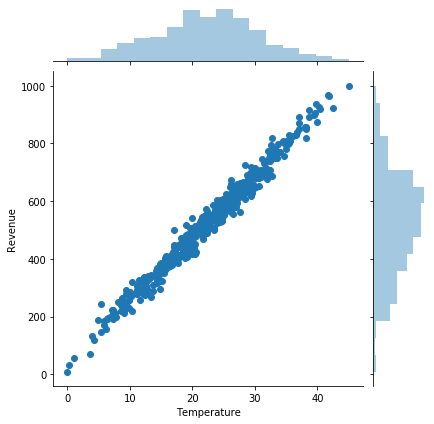

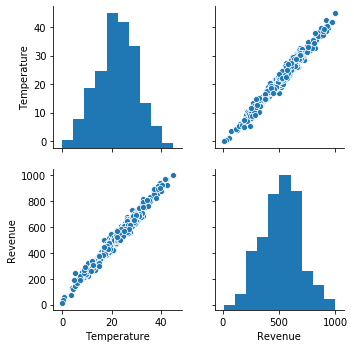

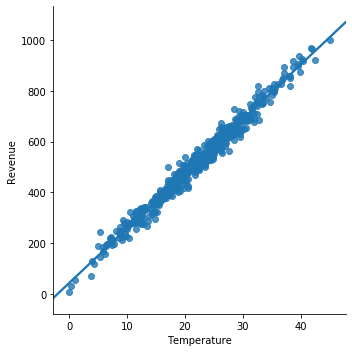

In [3]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)
sns.pairplot(IceCream)
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

## CREATE TESTING AND TRAINING DATASET

In [4]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
X_train.shape

from sklearn.linear_model import LinearRegression
print(X_train.shape)
print(X_test.shape)

(375, 1)
(125, 1)


In [9]:
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.45721304]
Linear Model Coefficient (b):  44.41790553531001


In [11]:
y_predict = regressor.predict(X_test)
y_predict
#y_test



array([569.795806  , 516.68846754, 329.8373836 , 605.92869105,
       356.64636588, 612.09102369, 199.41144817, 292.67021453,
       359.53734533, 572.59232544, 681.78688892, 543.22766742,
       413.4697396 , 606.33875449, 838.27221741, 576.08899073,
       693.02876463, 570.5883949 , 237.93751098, 254.32053335,
       531.03660099, 669.44780591, 563.33779941, 470.32729337,
       523.15147409, 604.92617809, 441.5557374 , 662.23884343,
       602.21947512, 570.73872349, 741.34377211, 511.66906065,
       606.41810927, 589.01135567, 639.24274911, 200.22620503,
       495.17054797, 564.60753793, 655.19603616, 797.99847647,
       189.79495077, 501.93702109, 569.52809594, 311.19842959,
       410.25775767, 316.67624365, 625.23478072, 520.15004299,
       539.81482559, 819.37865918, 609.53765138, 364.06541529,
       483.72417621, 129.95758243, 636.05679285, 264.24829011,
       394.17315956, 582.05586102, 621.05017057, 181.61177725,
       629.79350403, 643.74679236, 590.672124  , 659.14

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

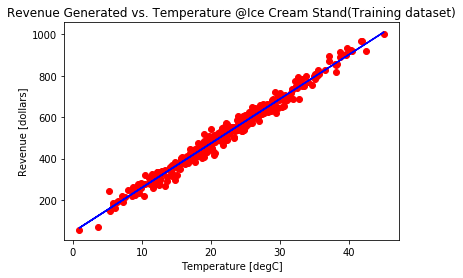

In [12]:
#VISUALIZE TRAIN SET RESULTS
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

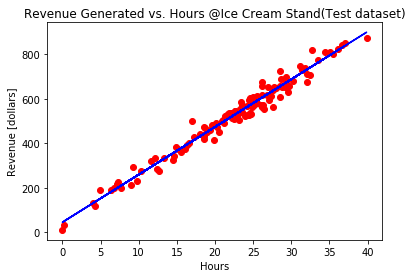

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

##y_predict = regressor.predict(30)


In [39]:
y_predict

array([309.55962111, 768.47864837, 570.49248996, 469.50980723,
       622.94174233, 688.94798602, 322.38063966, 892.51947864,
       659.43399781, 531.1051094 , 131.59823087, 308.79490815,
       562.36220646, 956.19902086, 596.85987363, 428.76106552,
       596.69919392, 186.3021076 , 655.37508656, 608.10193748,
       456.60205085, 353.64410409, 610.45136083, 621.46135189,
       262.86259614, 339.65466815, 606.83754356, 457.092296  ,
       403.77724737, 469.07233694, 470.35497368, 457.26391545,
       238.72139374, 496.28931797, 725.53961542, 412.95759015,
       171.66170504, 591.13191677, 538.6034396 , 682.31990738,
       442.39772981, 571.67131375, 351.5491792 , 468.50237881,
       424.8836806 , 673.47058326, 252.84118776, 540.4049705 ,
       462.19279446, 625.60598607, 520.25806475, 391.83421814,
       690.16753138, 411.17996981, 452.44886862, 539.73186652,
       495.87512046, 606.34937977, 685.77543814, 506.17240038,
       672.31664811, 670.90243397, 495.10694612, 450.96

In [15]:
from sklearn.metrics import accuracy_score

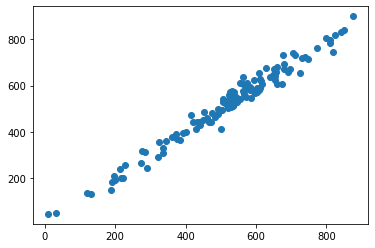

In [18]:
plt.scatter(y_test,y_predict)

In [21]:
acc_lr = round(regressor.score(X_test,y_test)*100,2)

In [22]:
acc_lr

97.43